In [1]:
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
from imutils import perspective
from imutils import contours
import imutils
import cv2
import os
import csv
import glob
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance 

# helper function
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

# control object width (mm)
width = 1000

#file directories
input_dir = '/Users/Zack/0_bing/images_1km_2019-10-13/'
enhanced_dir = '/Users/Zack/Desktop/temp/'
output_dir = '/Users/Zack/Desktop/temp/'

Image dimensions: (2149, 2144)
Pre-filter count:  135
Post-filter count:  27
{'count': 0, 'len_mm': 1047.02, 'wid_mm': 1000.0, 'x': 784, 'y': 1203, 'cX': 786, 'cY': 1153}
{'count': 1, 'len_mm': 802.01, 'wid_mm': 662.19, 'x': 828, 'y': 1252, 'cX': 856, 'cY': 1225}
{'count': 2, 'len_mm': 929.8, 'wid_mm': 499.67, 'x': 849, 'y': 1088, 'cX': 870, 'cY': 1075}
{'count': 3, 'len_mm': 750.48, 'wid_mm': 721.05, 'x': 857, 'y': 1329, 'cX': 882, 'cY': 1305}
{'count': 4, 'len_mm': 470.89, 'wid_mm': 463.59, 'x': 907, 'y': 1156, 'cX': 923, 'cY': 1140}
{'count': 5, 'len_mm': 384.99, 'wid_mm': 364.18, 'x': 916, 'y': 1033, 'cX': 933, 'cY': 1033}
{'count': 6, 'len_mm': 1652.38, 'wid_mm': 442.22, 'x': 940, 'y': 985, 'cX': 1003, 'cY': 937}
{'count': 7, 'len_mm': 463.59, 'wid_mm': 441.46, 'x': 952, 'y': 1198, 'cX': 968, 'cY': 1182}
{'count': 8, 'len_mm': 871.82, 'wid_mm': 687.95, 'x': 981, 'y': 1295, 'cX': 1002, 'cY': 1258}
{'count': 9, 'len_mm': 1888.26, 'wid_mm': 439.0, 'x': 970, 'y': 1034, 'cX': 1047, 'cY

{'count': 71, 'len_mm': 966.52, 'wid_mm': 432.57, 'x': 1693, 'y': 1790, 'cX': 1705, 'cY': 1789}
{'count': 72, 'len_mm': 771.16, 'wid_mm': 472.4, 'x': 1702, 'y': 1706, 'cX': 1719, 'cY': 1691}
{'count': 73, 'len_mm': 754.98, 'wid_mm': 470.89, 'x': 1732, 'y': 1601, 'cX': 1736, 'cY': 1579}
{'count': 74, 'len_mm': 826.2, 'wid_mm': 421.52, 'x': 1750, 'y': 1720, 'cX': 1751, 'cY': 1707}
{'count': 75, 'len_mm': 1360.46, 'wid_mm': 883.96, 'x': 1755, 'y': 914, 'cX': 1760, 'cY': 874}
{'count': 76, 'len_mm': 903.06, 'wid_mm': 450.25, 'x': 1743, 'y': 666, 'cX': 1755, 'cY': 662}
{'count': 77, 'len_mm': 2219.87, 'wid_mm': 1182.31, 'x': 1737, 'y': 1681, 'cX': 1773, 'cY': 1625}
{'count': 78, 'len_mm': 535.41, 'wid_mm': 369.49, 'x': 1760, 'y': 394, 'cX': 1775, 'cY': 387}
{'count': 79, 'len_mm': 627.94, 'wid_mm': 449.3, 'x': 1796, 'y': 905, 'cX': 1798, 'cY': 887}
{'count': 80, 'len_mm': 972.04, 'wid_mm': 391.86, 'x': 1815, 'y': 1573, 'cX': 1828, 'cY': 1547}
Total Count: 80 (excluding control object).
Imag

{'count': 51, 'len_mm': 235.67, 'wid_mm': 113.22, 'x': 1658, 'y': 470, 'cX': 1671, 'cY': 449}
{'count': 52, 'len_mm': 206.88, 'wid_mm': 164.42, 'x': 1666, 'y': 643, 'cX': 1675, 'cY': 628}
{'count': 53, 'len_mm': 185.44, 'wid_mm': 150.97, 'x': 1663, 'y': 227, 'cX': 1678, 'cY': 216}
{'count': 54, 'len_mm': 333.01, 'wid_mm': 97.09, 'x': 1703, 'y': 274, 'cX': 1723, 'cY': 246}
{'count': 55, 'len_mm': 1666.54, 'wid_mm': 423.17, 'x': 1916, 'y': 1891, 'cX': 1925, 'cY': 1849}
{'count': 56, 'len_mm': 568.98, 'wid_mm': 218.93, 'x': 1807, 'y': 510, 'cX': 1811, 'cY': 452}
{'count': 57, 'len_mm': 220.77, 'wid_mm': 202.51, 'x': 1843, 'y': 2097, 'cX': 1849, 'cY': 2075}
{'count': 58, 'len_mm': 463.8, 'wid_mm': 229.87, 'x': 1884, 'y': 2064, 'cX': 1892, 'cY': 2042}
{'count': 59, 'len_mm': 972.78, 'wid_mm': 590.64, 'x': 1882, 'y': 1990, 'cX': 1972, 'cY': 1947}
{'count': 60, 'len_mm': 360.27, 'wid_mm': 100.08, 'x': 1866, 'y': 550, 'cX': 1875, 'cY': 514}
{'count': 61, 'len_mm': 225.0, 'wid_mm': 176.85, 'x':

{'count': 38, 'len_mm': 1059.49, 'wid_mm': 461.47, 'x': 2091, 'y': 1747, 'cX': 2092, 'cY': 1716}
Total Count: 38 (excluding control object).
Image dimensions: (2114, 2106)
Pre-filter count:  1667
Post-filter count:  149
{'count': 0, 'len_mm': 1000.0, 'wid_mm': 642.86, 'x': 169, 'y': 1200, 'cX': 187, 'cY': 1200}
{'count': 1, 'len_mm': 669.23, 'wid_mm': 441.94, 'x': 175, 'y': 1124, 'cX': 184, 'cY': 1115}
{'count': 2, 'len_mm': 875.73, 'wid_mm': 474.48, 'x': 181, 'y': 1815, 'cX': 194, 'cY': 1810}
{'count': 3, 'len_mm': 1555.21, 'wid_mm': 733.01, 'x': 202, 'y': 658, 'cX': 204, 'cY': 614}
{'count': 4, 'len_mm': 2479.31, 'wid_mm': 1347.0, 'x': 181, 'y': 768, 'cX': 224, 'cY': 714}
{'count': 5, 'len_mm': 555.37, 'wid_mm': 385.59, 'x': 193, 'y': 1384, 'cX': 203, 'cY': 1383}
{'count': 6, 'len_mm': 2120.96, 'wid_mm': 1707.41, 'x': 204, 'y': 571, 'cX': 244, 'cY': 546}
{'count': 7, 'len_mm': 795.45, 'wid_mm': 626.59, 'x': 214, 'y': 1115, 'cX': 215, 'cY': 1093}
{'count': 8, 'len_mm': 999.52, 'wid_mm

{'count': 95, 'len_mm': 1763.36, 'wid_mm': 1127.87, 'x': 1149, 'y': 1115, 'cX': 1181, 'cY': 1113}
{'count': 96, 'len_mm': 2099.87, 'wid_mm': 1568.99, 'x': 1191, 'y': 1060, 'cX': 1224, 'cY': 1031}
{'count': 97, 'len_mm': 656.23, 'wid_mm': 322.67, 'x': 1180, 'y': 1584, 'cX': 1182, 'cY': 1575}
{'count': 98, 'len_mm': 778.58, 'wid_mm': 432.28, 'x': 1185, 'y': 1800, 'cX': 1193, 'cY': 1790}
{'count': 99, 'len_mm': 689.58, 'wid_mm': 555.37, 'x': 1184, 'y': 1196, 'cX': 1186, 'cY': 1177}
{'count': 100, 'len_mm': 1181.98, 'wid_mm': 815.05, 'x': 1169, 'y': 1685, 'cX': 1194, 'cY': 1662}
{'count': 101, 'len_mm': 1210.74, 'wid_mm': 560.73, 'x': 1194, 'y': 1779, 'cX': 1207, 'cY': 1769}
{'count': 102, 'len_mm': 696.49, 'wid_mm': 673.68, 'x': 1181, 'y': 897, 'cX': 1197, 'cY': 886}
{'count': 103, 'len_mm': 660.96, 'wid_mm': 393.26, 'x': 1195, 'y': 1104, 'cX': 1204, 'cY': 1097}
{'count': 104, 'len_mm': 866.81, 'wid_mm': 536.38, 'x': 1198, 'y': 758, 'cX': 1213, 'cY': 757}
{'count': 105, 'len_mm': 1442.9, 

{'count': 10, 'len_mm': 2084.33, 'wid_mm': 1514.27, 'x': 1129, 'y': 1204, 'cX': 1152, 'cY': 1187}
{'count': 11, 'len_mm': 3555.85, 'wid_mm': 2628.0, 'x': 1352, 'y': 1642, 'cX': 1371, 'cY': 1611}
{'count': 12, 'len_mm': 1948.58, 'wid_mm': 1347.87, 'x': 1332, 'y': 1689, 'cX': 1348, 'cY': 1680}
{'count': 13, 'len_mm': 4081.93, 'wid_mm': 1547.43, 'x': 1326, 'y': 1958, 'cX': 1374, 'cY': 1929}
{'count': 14, 'len_mm': 1220.16, 'wid_mm': 1194.5, 'x': 1345, 'y': 2009, 'cX': 1356, 'cY': 1997}
{'count': 15, 'len_mm': 1803.19, 'wid_mm': 1093.07, 'x': 1340, 'y': 1790, 'cX': 1365, 'cY': 1788}
{'count': 16, 'len_mm': 2105.96, 'wid_mm': 1997.03, 'x': 1342, 'y': 29, 'cX': 1369, 'cY': 29}
{'count': 17, 'len_mm': 2233.71, 'wid_mm': 1258.07, 'x': 1362, 'y': 1858, 'cX': 1374, 'cY': 1845}
{'count': 18, 'len_mm': 5508.79, 'wid_mm': 2940.86, 'x': 1377, 'y': 1554, 'cX': 1440, 'cY': 1512}
{'count': 19, 'len_mm': 1561.32, 'wid_mm': 1016.67, 'x': 1454, 'y': 2109, 'cX': 1475, 'cY': 2109}
{'count': 20, 'len_mm': 12

{'count': 76, 'len_mm': 517.86, 'wid_mm': 500.0, 'x': 1503, 'y': 1037, 'cX': 1517, 'cY': 1037}
{'count': 77, 'len_mm': 517.86, 'wid_mm': 464.29, 'x': 1504, 'y': 996, 'cX': 1517, 'cY': 996}
{'count': 78, 'len_mm': 553.57, 'wid_mm': 553.57, 'x': 1508, 'y': 1212, 'cX': 1523, 'cY': 1212}
{'count': 79, 'len_mm': 464.29, 'wid_mm': 464.29, 'x': 1508, 'y': 1124, 'cX': 1521, 'cY': 1124}
{'count': 80, 'len_mm': 530.33, 'wid_mm': 517.86, 'x': 1515, 'y': 1262, 'cX': 1526, 'cY': 1252}
{'count': 81, 'len_mm': 696.43, 'wid_mm': 500.0, 'x': 1542, 'y': 1165, 'cX': 1561, 'cY': 1165}
{'count': 82, 'len_mm': 785.71, 'wid_mm': 767.86, 'x': 1542, 'y': 808, 'cX': 1563, 'cY': 808}
{'count': 83, 'len_mm': 517.86, 'wid_mm': 482.14, 'x': 1544, 'y': 864, 'cX': 1557, 'cY': 864}
{'count': 84, 'len_mm': 500.0, 'wid_mm': 482.14, 'x': 1546, 'y': 952, 'cX': 1559, 'cY': 952}
{'count': 85, 'len_mm': 500.0, 'wid_mm': 482.14, 'x': 1546, 'y': 908, 'cX': 1559, 'cY': 908}
{'count': 86, 'len_mm': 517.86, 'wid_mm': 500.0, 'x': 

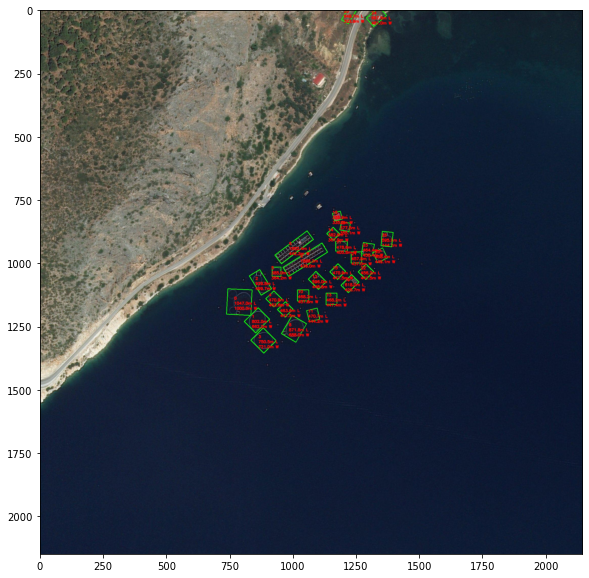

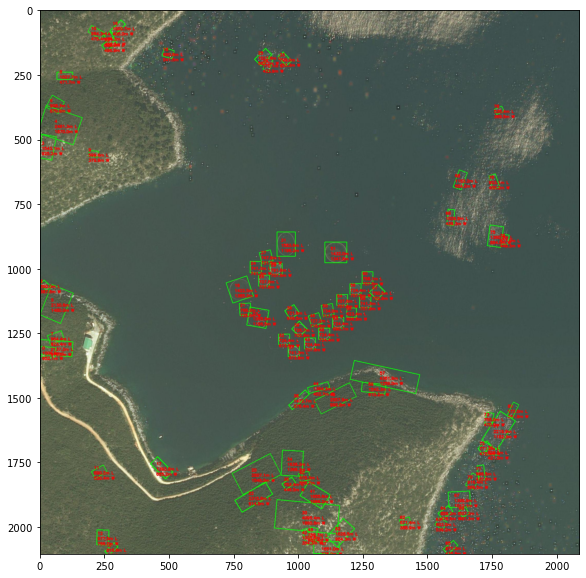

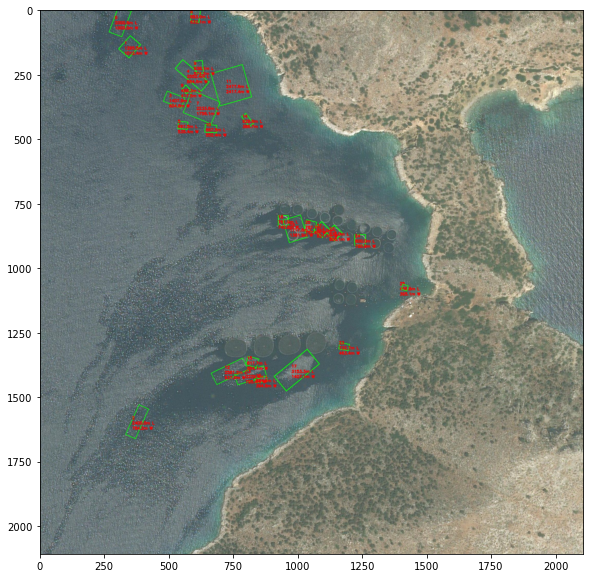

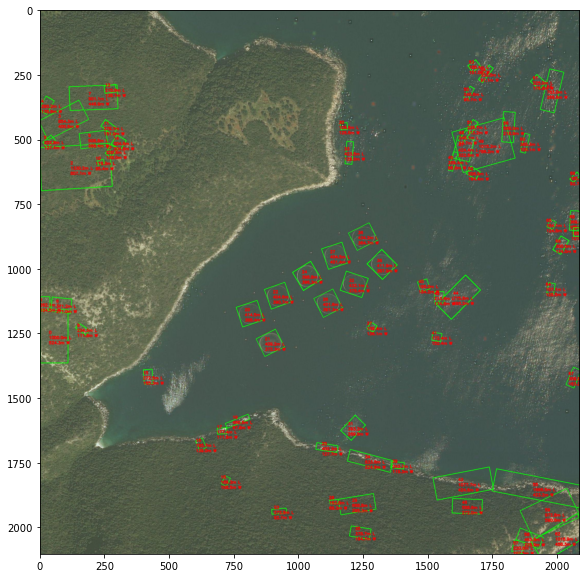

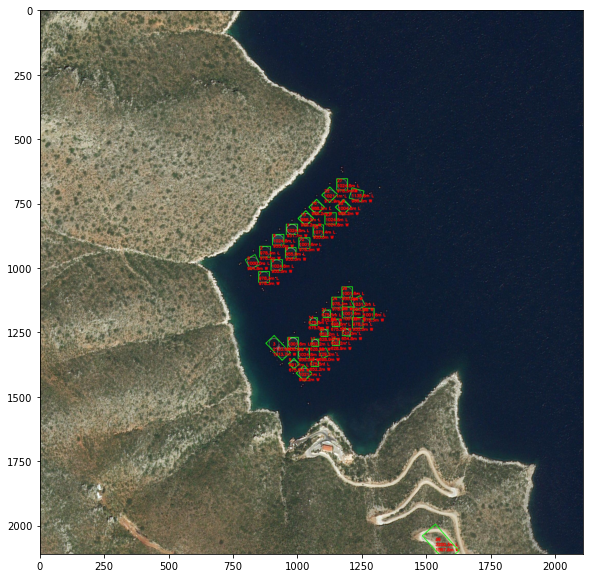

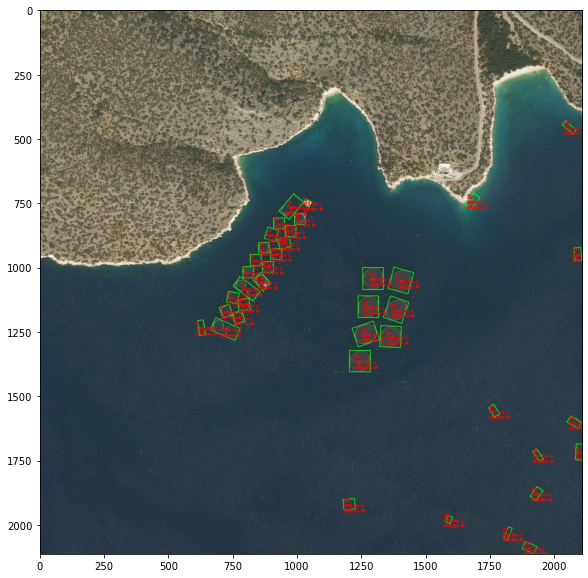

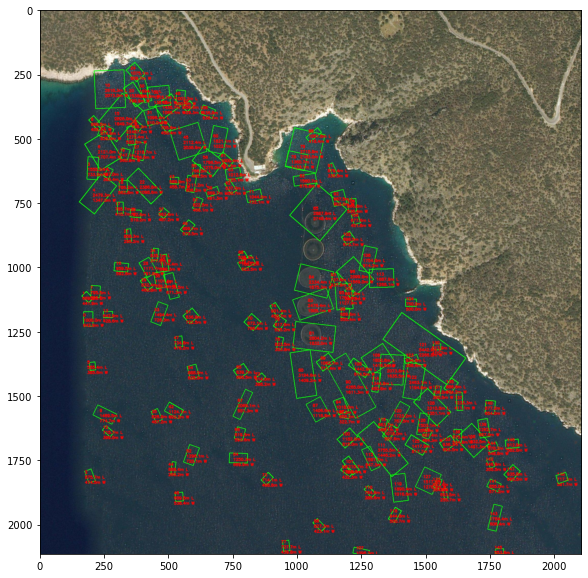

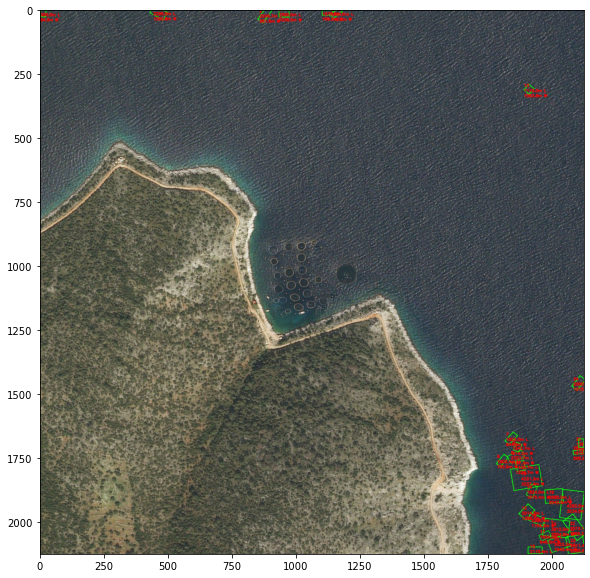

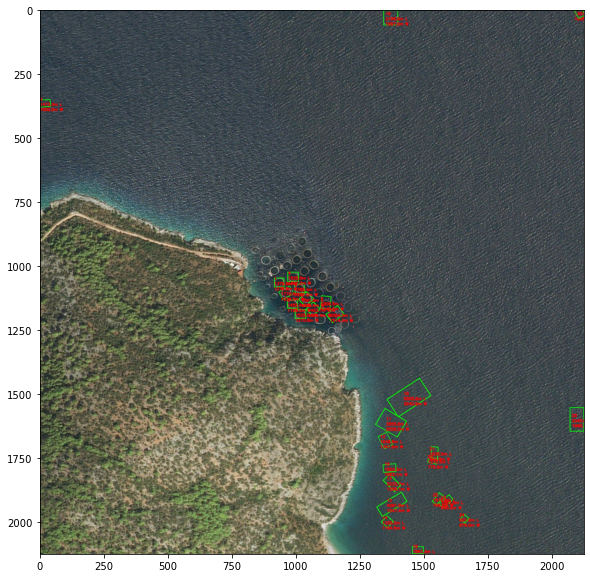

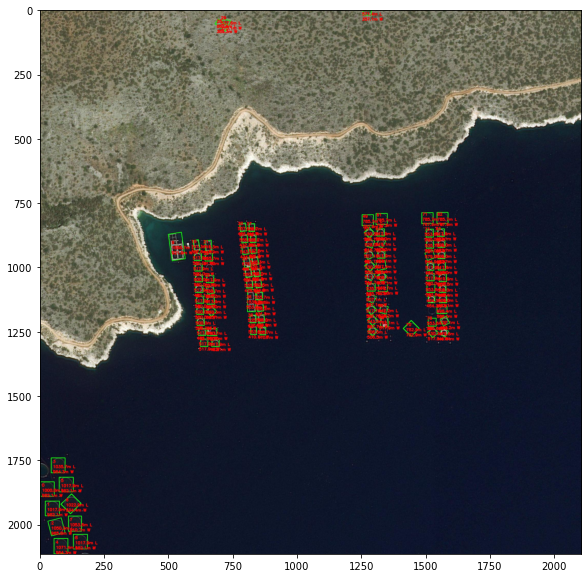

In [4]:
def size(input_dir, file):
    image = cv2.imread(input_dir+file)
    print('Image dimensions:', image.shape[:2])
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.blur(gray,(3,3)) #blur
    #re, gray = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
    edged = cv2.Canny(gray, 10, 100)
    edged = cv2.dilate(edged, None, iterations=1)
    edged = cv2.erode(edged, None, iterations=1)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # sort the contours from left-to-right and initialize the
    # 'pixels per metric' calibration variable
    (cnts, _) = contours.sort_contours(cnts)
    pixelsPerMetric = None

    # remove smaller matches
    print("Pre-filter count: ", len(cnts))

    # if the contour is not sufficiently large, ignore it
    cnts = [c for c in cnts if cv2.contourArea(c) > 250] 
    cnts = [c for c in cnts if cv2.contourArea(c) < 10000] 
    print("Post-filter count: ", len(cnts))

    m_all = []
    boxes = []
    # loop over the contours individually
    for idx, c in enumerate(cnts):
        # compute bounding box
        orig = image.copy()
        #orig = Image.open('/Users/Zack/Desktop/in3/176_(18, 36.9528, 27.0276, 36.9438, 27.0388).jpeg')
        box = cv2.minAreaRect(c)
        box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
        box = np.array(box, dtype="int")

        # unpack the ordered bounding box
        (tl, tr, br, bl) = box

        # compute the midpoint between the top-left and top-right coordinates
        (tltrX, tltrY) = midpoint(tl, tr)

        # compute the midpoint between bottom-left and bottom-right coordinates
        (blbrX, blbrY) = midpoint(bl, br)

        # compute the midpoint between the top-left and top-right points
        (tlblX, tlblY) = midpoint(tl, bl)

        # compute the midpoint between the top-righ and bottom-right
        (trbrX, trbrY) = midpoint(tr, br)

        # compute centroid
        cX = int((tl[0] + br[0]) / 2)
        cY = int((tr[1] + bl[1]) /2)

        # compute the Euclidean distance between the midpoints
        dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
        dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

        # if the pixels per metric has not been initialized, then
        # compute it as the ratio of pixels to supplied metric
        if pixelsPerMetric is None: pixelsPerMetric = dB / width

        # compute the size of the object
        dA = round(dA / pixelsPerMetric, 2)
        dB = round(dB / pixelsPerMetric, 2)
        
        #min and max to associate longest measurement = length
        dim = (dA, dB)
        dimL = max(dim)
        dimW = min(dim)

        m = {'count' : idx, 'len_mm': dimL, 'wid_mm': dimW, 
             'x': int(tltrX), 'y':int(tltrY), 'cX': cX, 'cY': cY}
        m_all.append(m)
        boxes.append(box)
        print(m)

    f1 = .5 #font size
    f2 = 2 #font thickness

    for b in boxes:
        for m in m_all:
            cv2.putText(orig, 
                         (format(m['count'])),                      
                        (m['cX']-20, m['cY']-10), cv2.FONT_HERSHEY_SIMPLEX, f1, (0, 0, 255), f2) #255,255,255
            cv2.putText(orig, 
                         #("{:.1f}mm L".format(m['len_mm'])),    
                         ("{:.1f}m L".format(m['len_mm'])),   
                        (m['cX']-20, m['cY']+10), cv2.FONT_HERSHEY_SIMPLEX, f1, (0, 0, 255), f2) #f2
            cv2.putText(orig, 
                         #("{:.1f}mm W".format(m['wid_mm'])),      
                         ("{:.1f}m W".format(m['wid_mm'])),       
                        (m['cX']-20, m['cY']+30), cv2.FONT_HERSHEY_SIMPLEX, f1, (0, 0, 255), f2)
        box = perspective.order_points(b)
        cv2.drawContours(orig, [box.astype("int")], 0, (0, 255, 0), 2)

    print('Total Count:', (len(m_all)-1), '(excluding control object).')
    f_label = output_dir + file[:-4] + '_labeled.jpg'
    

    labeled = cv2.imwrite(f_label, orig)
    labeled = plt.imread(f_label)
    fig = plt.figure(figsize=(20,10))
    plt.imshow(labeled)

    # export measurments to CSV
#     with open((output_dir + file[:-4] + '.csv'), 'w', newline='') as f:
#         thewriter = csv.writer(f)
#         thewriter.writerow(['count', 'len_mm', 'wid_mm', 'group'])

#         for m in m_all[1:]: #skip 0 to omit control object
#             thewriter.writerow([m['count'], m['len_mm'], m['wid_mm'], file[:-4]])
#         print('Measurements writen to CSV file successfully.')
#     return 

folder = os.listdir(input_dir)
#len(folder)

# make a list of files to process
files=[]
for filename in folder[0:10]:
    files.append(filename)
#print(files)

# process all files
for images in files:
    size(input_dir, images)